# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.073572e+01     7.746767e+00
 * time: 0.004372119903564453
     1     2.821946e+01     4.812971e+00
 * time: 0.012791156768798828
     2     1.652399e+01     3.153193e+00
 * time: 0.12141203880310059
     3     1.273516e+01     3.038601e+00
 * time: 0.14075899124145508
     4     1.230597e+01     2.188926e+00
 * time: 0.1562199592590332
     5     1.159516e+01     1.835875e+00
 * time: 0.1716899871826172
     6     1.065580e+01     1.123673e+00
 * time: 0.186812162399292
     7     1.010880e+01     1.039000e+00
 * time: 0.20195508003234863
     8     9.803922e+00     7.553870e-01
 * time: 0.21754002571105957
     9     9.598007e+00     5.483160e-01
 * time: 0.23287296295166016
    10     9.458894e+00     4.691746e-01
 * time: 0.24835610389709473
    11     9.444038e+00     7.085387e-01
 * time: 0.2599921226501465
    12     9.386619e+00     4.138245e-01
 * time: 0.2716381549835205
    13     9.298491e+00     3.672736e-01
 * time: 0.2

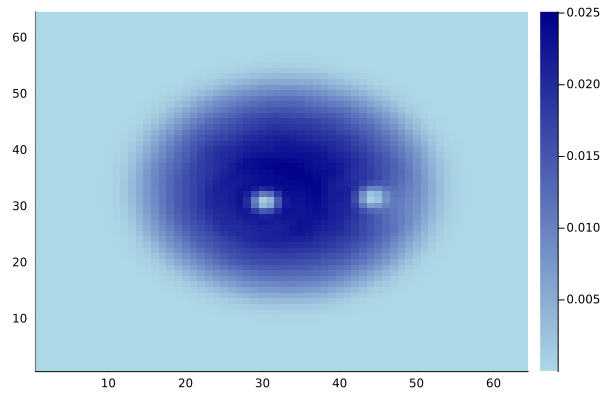

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)